In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2012 = pd.read_csv('/Users/roryobrien/Downloads/E0-2.csv')

In [3]:
df2013 = pd.read_csv('/Users/roryobrien/Downloads/E0-3.csv')

In [4]:
df2014 = pd.read_csv('/Users/roryobrien/Downloads/E0-4.csv')

In [5]:
df2015 = pd.read_csv('/Users/roryobrien/Downloads/E0-5.csv')

In [6]:
df2016 = pd.read_csv('/Users/roryobrien/Downloads/E0-6.csv')

In [7]:
df2017 = pd.read_csv('/Users/roryobrien/Downloads/E0-7.csv')

In [8]:
df2018 = pd.read_csv('/Users/roryobrien/Downloads/E0-8.csv')

In [9]:
df2019 = pd.read_csv('/Users/roryobrien/Downloads/E0-9.csv')

In [10]:
df2020 = pd.read_csv('/Users/roryobrien/Downloads/E0-10.csv')

In [11]:
df2021 = pd.read_csv('/Users/roryobrien/Downloads/E0-11.csv')

I imported the files for the stats of each game from each season from 2012/13 to 2021/22 (10 seasons)

In [12]:
df2012.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

The columns we are interested in are:
FTR (Full Time Result)
B365H (Bet365 odds on home team to win)
B365D (Bet365 odds on draw team to win)
B365A (Bet365 odds on away team to win)

In [13]:
def season(dataframe):
    home = dataframe[dataframe['FTR'] == 'H']
    away = dataframe[dataframe['FTR'] == 'A']
    draw = dataframe[dataframe['FTR'] == 'D']
    underdog_home = dataframe[((dataframe['FTR'] == 'H') & (dataframe['B365H'] > dataframe['B365A']))]
    underdog_away = dataframe[((dataframe['FTR'] == 'A') & (dataframe['B365A'] > dataframe['B365H']))]
    favourite_home = dataframe[((dataframe['FTR'] == 'H') & (dataframe['B365H'] < dataframe['B365A']))]
    favourite_away = dataframe[((dataframe['FTR'] == 'A') & (dataframe['B365A'] < dataframe['B365H']))]
    z = []
    z.extend([home['B365H'].sum()-380,away['B365A'].sum()-380, draw['B365D'].sum()-380, (underdog_home['B365H'].sum() + underdog_away['B365A'].sum())-380, (favourite_home['B365H'].sum() + favourite_away['B365A'].sum())-380])
    return z


    

This is a function that gives us the values returned if we placed a $1 bet on a particular result for every single game out of 380 in a Premier League season, for each season that we have data for. The betting odds are based on Bet365.
I used 5 categories for this:
Home Win
Away Win
Draw
Underdog Win
Favourite Win

I took away $380 from the sum of the betting values as this is what the stake would be over a season. z returned is a list of the 5 values from the input of the function (dataframe) a.k.a the season

In [14]:
matrix = [season(df2012), season(df2013), season(df2014), season(df2015), season(df2016), season(df2017), season(df2018), season(df2019), season(df2020), season(df2021)]

Here I created a matrix of the result of the function described above in each of the dataframes for each season. This is now a matrix with 5 columns (the features stated above) and 10 rows (for each season)

In [15]:
matrix

[[-42.64000000000004,
  -46.21999999999997,
  17.039999999999964,
  -69.39999999999998,
  -19.45999999999998],
 [8.389999999999986,
  9.829999999999984,
  -75.03000000000003,
  -12.800000000000011,
  31.019999999999982],
 [-6.319999999999993,
  1.6000000000000227,
  -27.46999999999997,
  1.1899999999999409,
  -11.489999999999952],
 [-33.66999999999996,
  32.05000000000001,
  22.149999999999977,
  37.33999999999992,
  -47.210000000000036],
 [24.92999999999995,
  -72.08999999999997,
  -45.66999999999996,
  -77.75,
  25.159999999999968],
 [10.980000000000018,
  -57.41999999999996,
  18.840000000000032,
  -32.40999999999997,
  -19.569999999999993],
 [19.17999999999995,
  -7.449999999999989,
  -98.49000000000001,
  10.629999999999995,
  -1.7000000000000455],
 [16.00999999999999,
  -16.379999999999995,
  -23.37000000000006,
  30.96999999999997,
  -34.039999999999964],
 [-62.68000000000001,
  108.75999999999999,
  -46.69,
  76.65000000000003,
  -33.32000000000005],
 [-39.370000000000005,
  -1

In [16]:
matrix = np.round(matrix, 2)

Rounded the np array to 2 decimal places to make it cleaner

In [17]:
df = pd.DataFrame(matrix, columns = ['Home', 'Away', 'Draw', 'Underdog', 'Favourite'])

Created a pandas dataframe of the array, with names for each of the columns corresponding to the relevant feature

In [18]:
df

,Home,Away,Draw,Underdog,Favourite
0,-42.64,-46.22,17.04,-69.40,-19.46
1,8.39,9.83,-75.03,-12.80,31.02
2,-6.32,1.60,-27.47,1.19,-11.49
3,-33.67,32.05,22.15,37.34,-47.21
4,24.93,-72.09,-45.67,-77.75,25.16
5,10.98,-57.42,18.84,-32.41,-19.57
6,19.18,-7.45,-98.49,10.63,-1.70
7,16.01,-16.38,-23.37,30.97,-34.04
8,-62.68,108.76,-46.69,76.65,-33.32
9,-39.37,-16.89,-33.32,-65.68,6.80


In [19]:
season = ['2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

In [20]:
df['Season'] = ['2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

In [21]:
df.set_index('Season', inplace = True)

In [22]:
df

,Home,Away,Draw,Underdog,Favourite
Season,,,,,
2012/13,-42.64,-46.22,17.04,-69.40,-19.46
2013/14,8.39,9.83,-75.03,-12.80,31.02
2014/15,-6.32,1.60,-27.47,1.19,-11.49
2015/16,-33.67,32.05,22.15,37.34,-47.21
2016/17,24.93,-72.09,-45.67,-77.75,25.16
2017/18,10.98,-57.42,18.84,-32.41,-19.57
2018/19,19.18,-7.45,-98.49,10.63,-1.70
2019/20,16.01,-16.38,-23.37,30.97,-34.04
2020/21,-62.68,108.76,-46.69,76.65,-33.32


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Home,10.0,-10.519,31.270711,-62.68,-37.9450,1.035,14.7525,24.93
Away,10.0,-6.421,51.404959,-72.09,-38.8875,-11.915,7.7725,108.76
Draw,10.0,-29.201,40.298073,-98.49,-46.4350,-30.395,6.9375,22.15
Underdog,10.0,-10.126,51.323837,-77.75,-57.3625,-5.805,25.8850,76.65
Favourite,10.0,-10.381,25.729726,-47.21,-29.8825,-15.475,4.6750,31.02


Some good information here, overall the mean for each type of strategy is a loss (negative return). This is perhaps unsurprising. The maximum return was from a season betting on Away wins, and the minimum return was a season betting on Draws. If i was to guess from personal domain knowledge, i would say that this maximum return for away wins came in either the 2020/21 or the 2021/22 when there were no crowds in stadiums, which largely reduces the home advantage in football matches. It is possible that the bookies didn't account for this to a large enough extent

<AxesSubplot:>

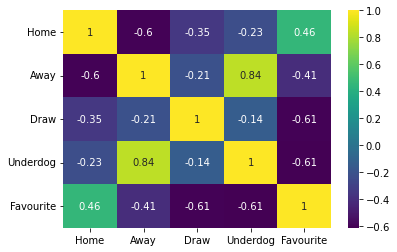

In [24]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

This heatmap showing the correlations of the different categories is quite interesting. 

Pretty trivial findings include home and away having a negative correlation. 

Home and Favourite have a positive correlation (0.46) which could suggest a positive relationship between them. This is likely due to the fact that home teams are most likely to be favourites.

Similarly, Away and Underdog have a positive correlation of 0.84. Again away teams are most often the underdogs.

This heatmap mainly gives a better idea of which combinations perform better and worse together. That is to say, if home return is positive, favourite return is likely to be positive too. 

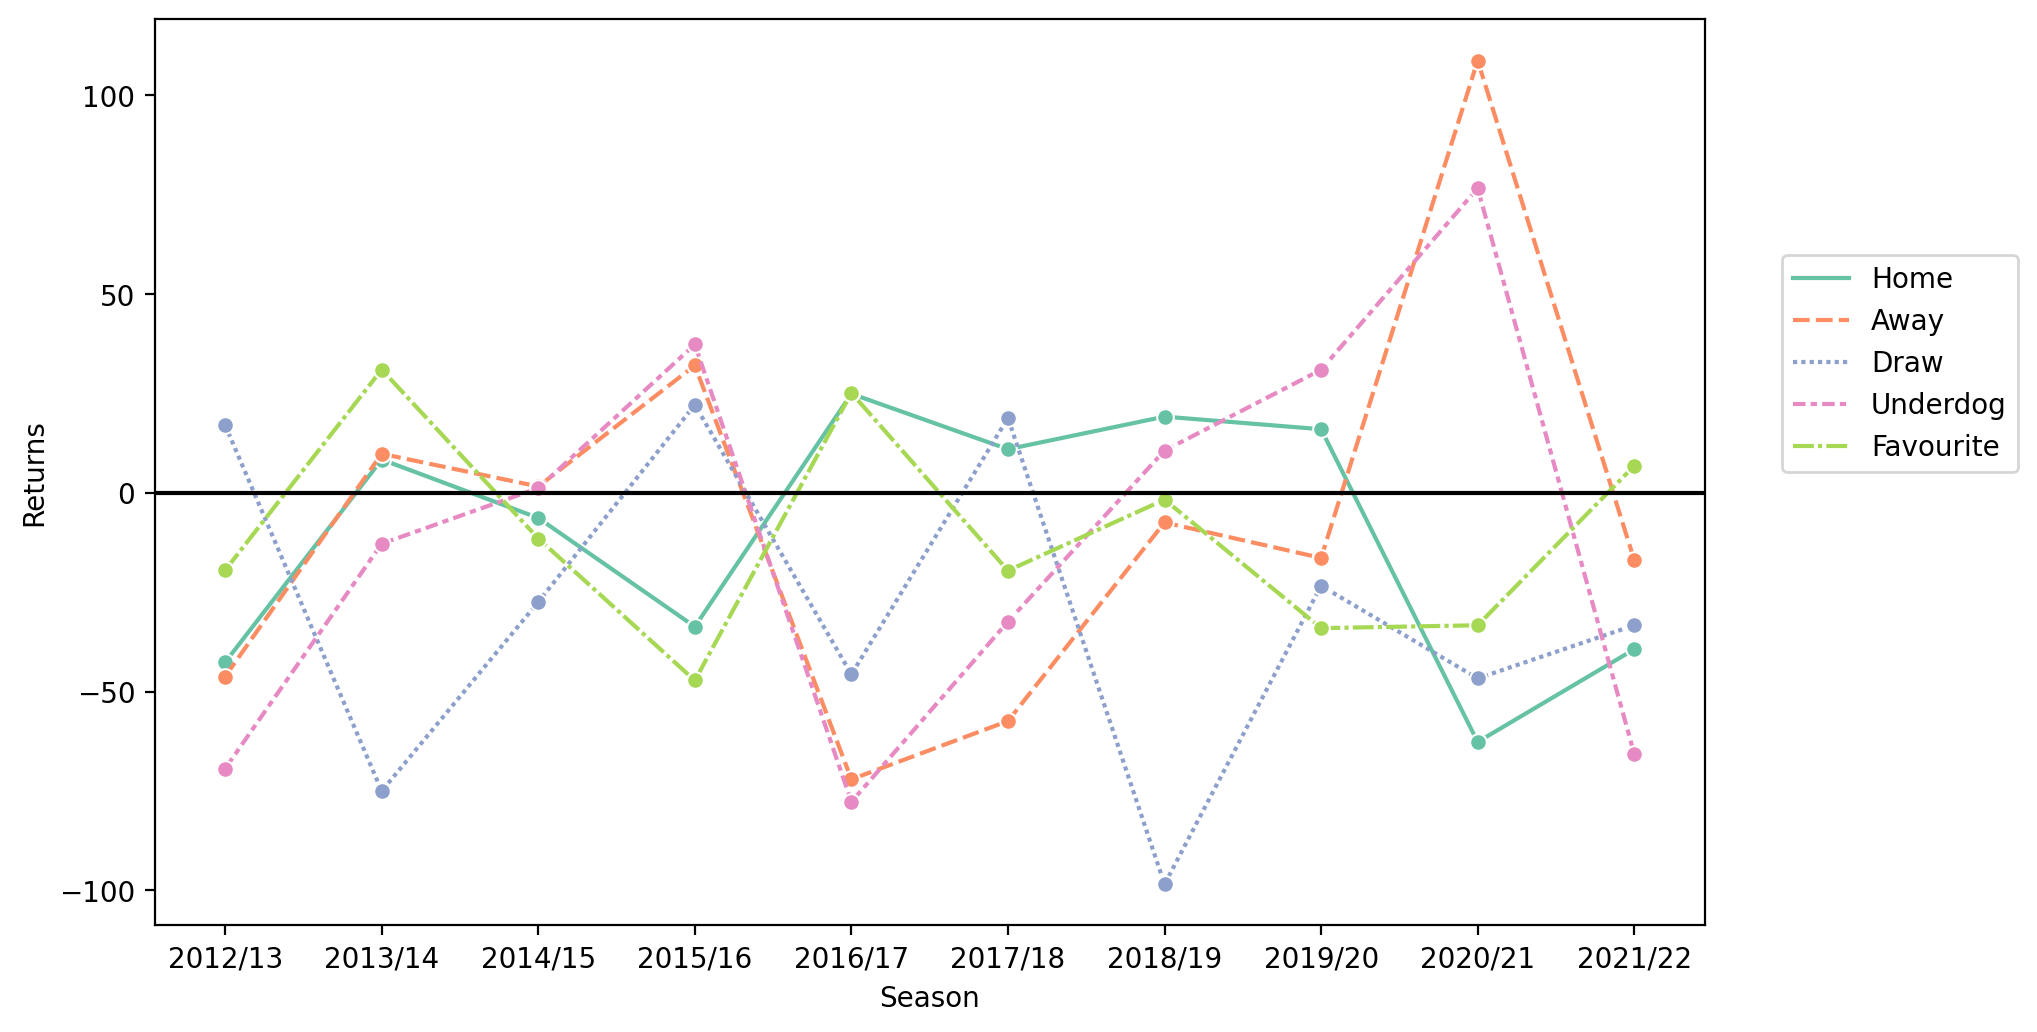

In [25]:
plt.figure(figsize = (10,6), dpi = 200)
sns.lineplot(data = df[['Home','Away','Draw','Underdog','Favourite']] , palette = 'Set2', marker = 'o')
plt.ylabel('Returns')
plt.legend(loc = (1.05,0.5))
plt.axhline(y = 0, color = 'black')

This plot shows the large variance in the returns for each of the categories. As the dataframe showed, most of the returns were negative i.e a loss. The black horizontal line represents the break-even point.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Home Return')

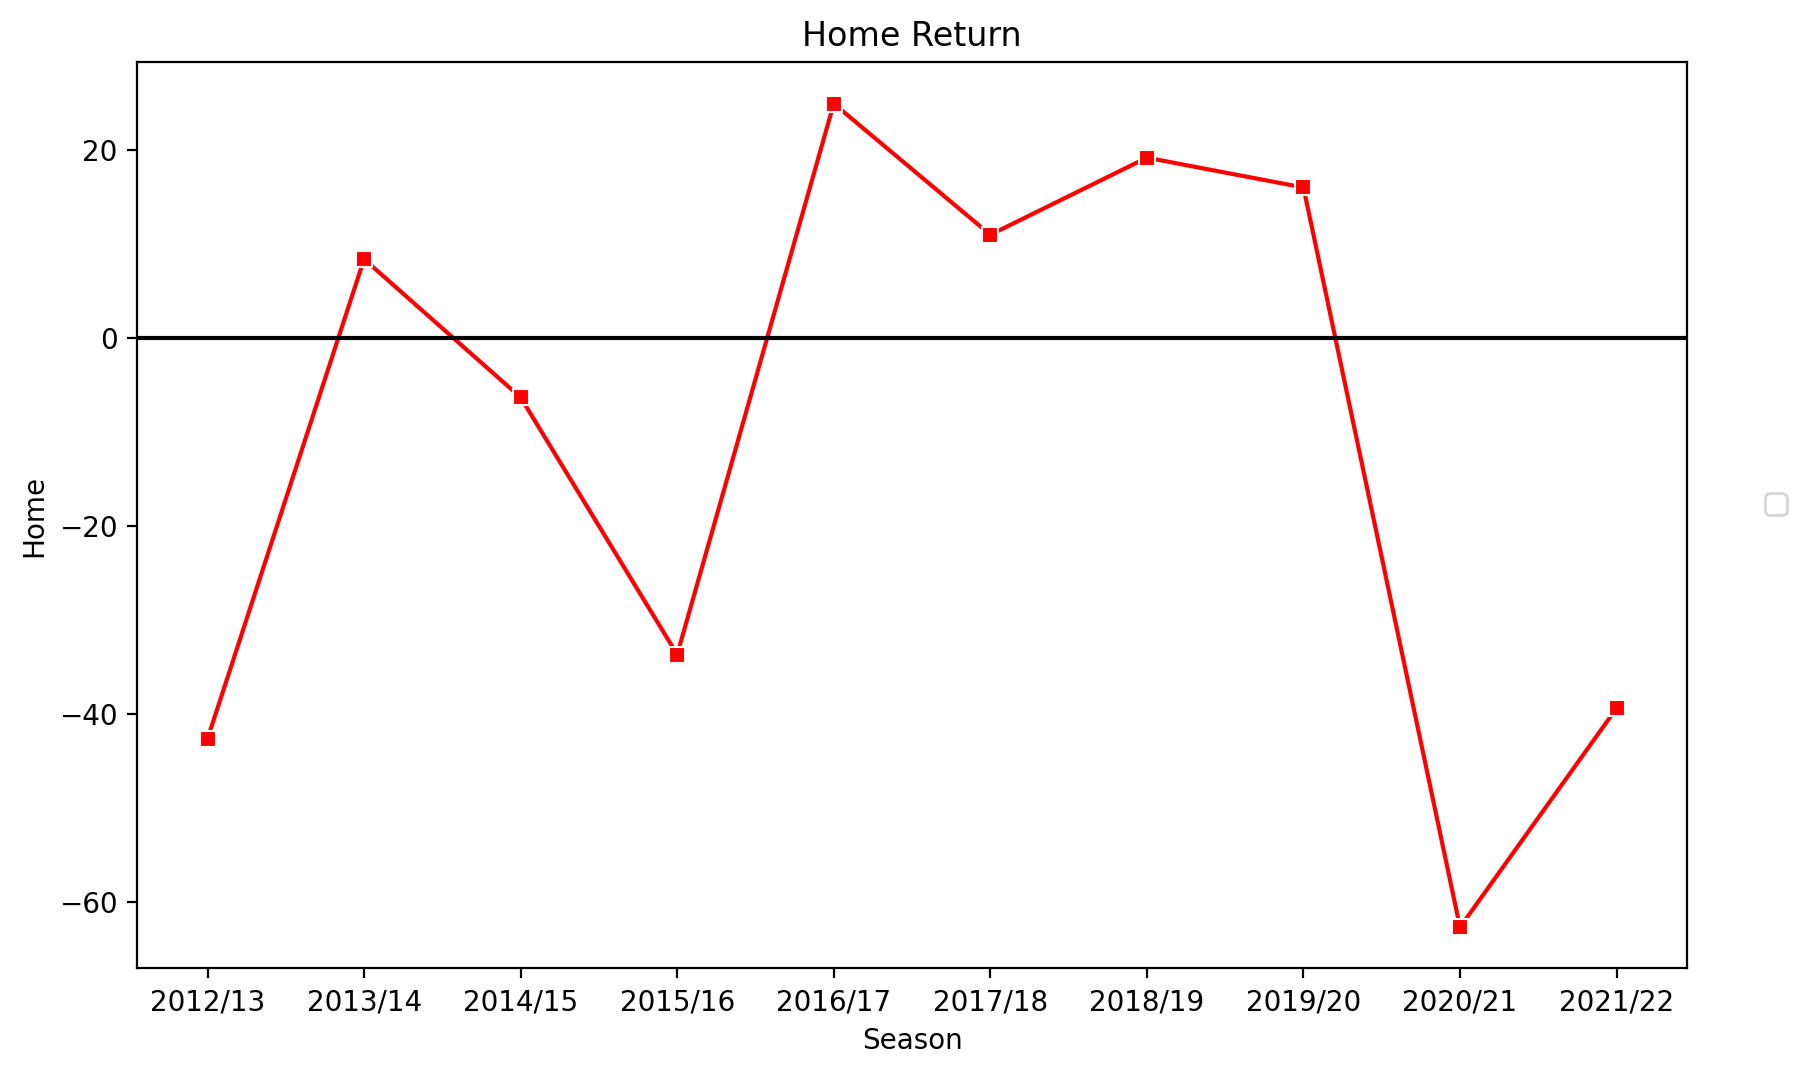

In [26]:
plt.figure(figsize = (10,6), dpi = 200)
sns.lineplot(data = df['Home'], color = 'red', marker = 's')
plt.legend(loc = (1.05,0.5))
plt.axhline(y = 0, color = 'black')
plt.title('Home Return')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


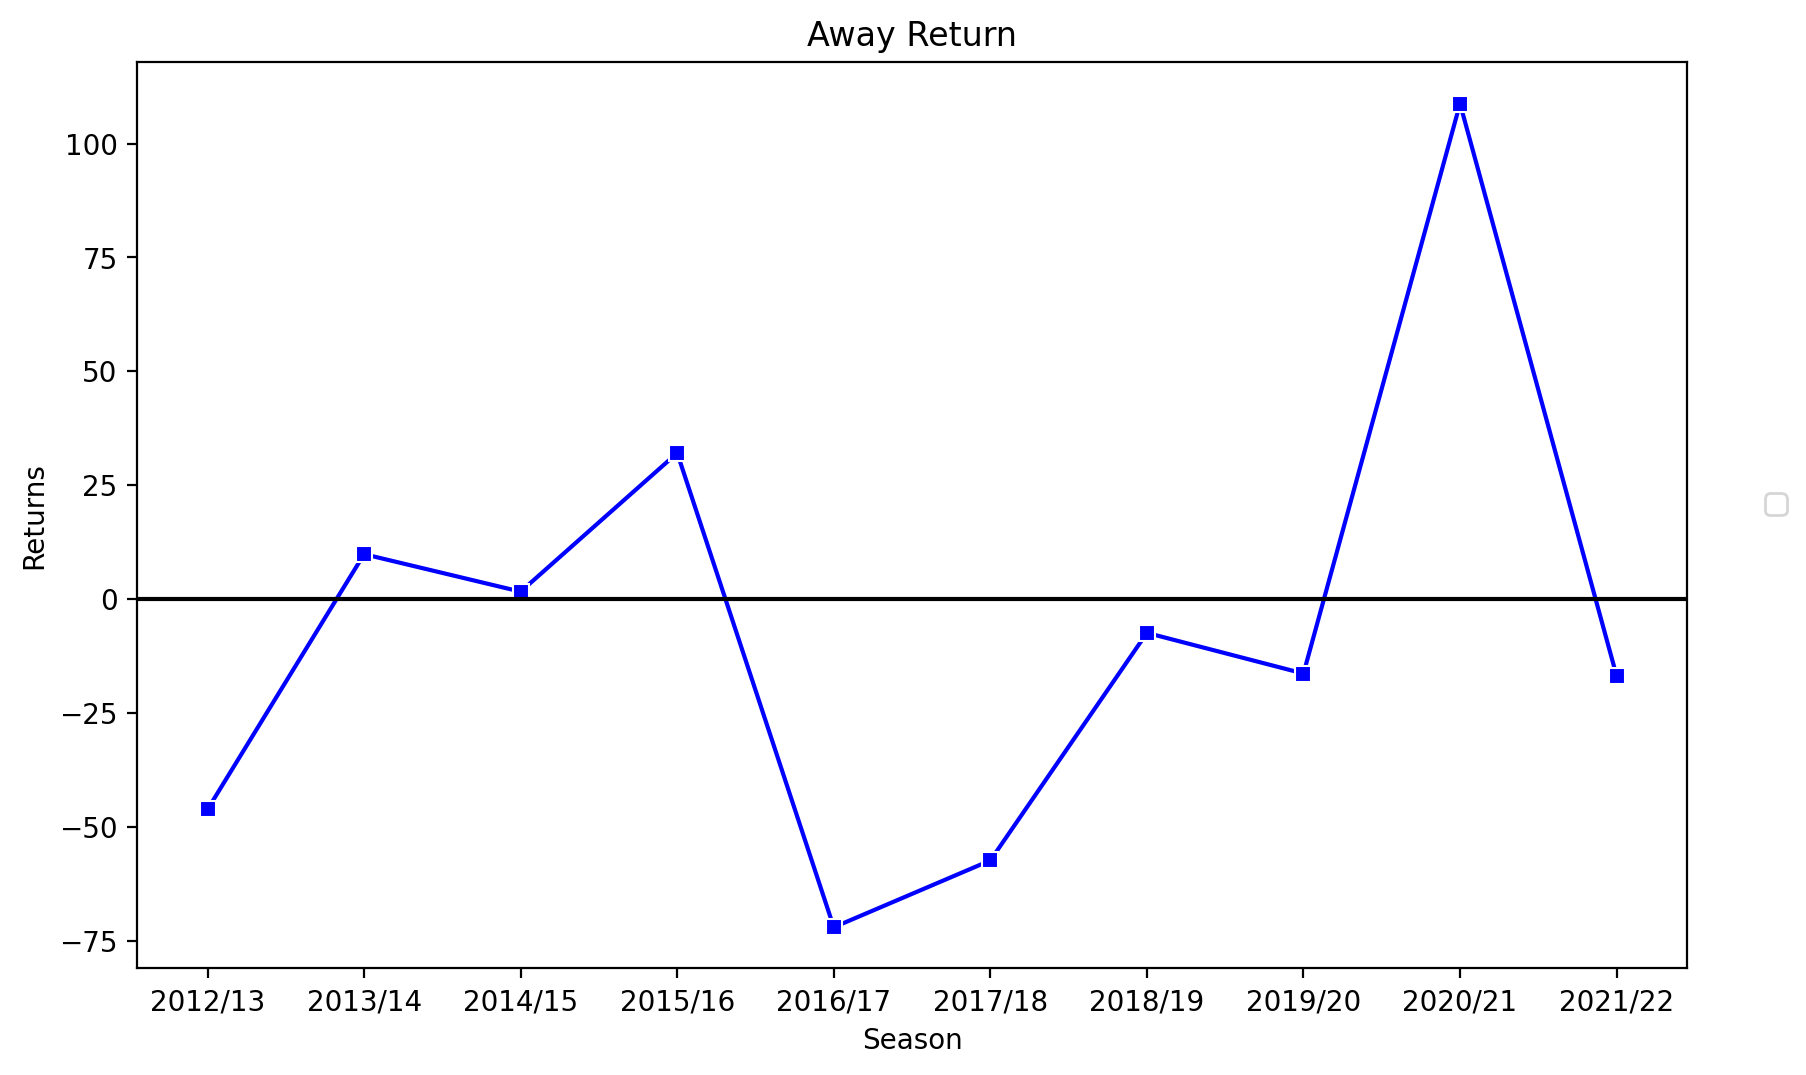

In [27]:
plt.figure(figsize = (10,6), dpi = 200)
sns.lineplot(data = df['Away'], color = 'blue', marker = 's')
plt.legend(loc = (1.05,0.5))
plt.ylabel('Returns')
plt.axhline(y = 0, color = 'black')
plt.title('Away Return');

Indeed, as previously suggested the spike in returns for betting on away wins was in 2020/21

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


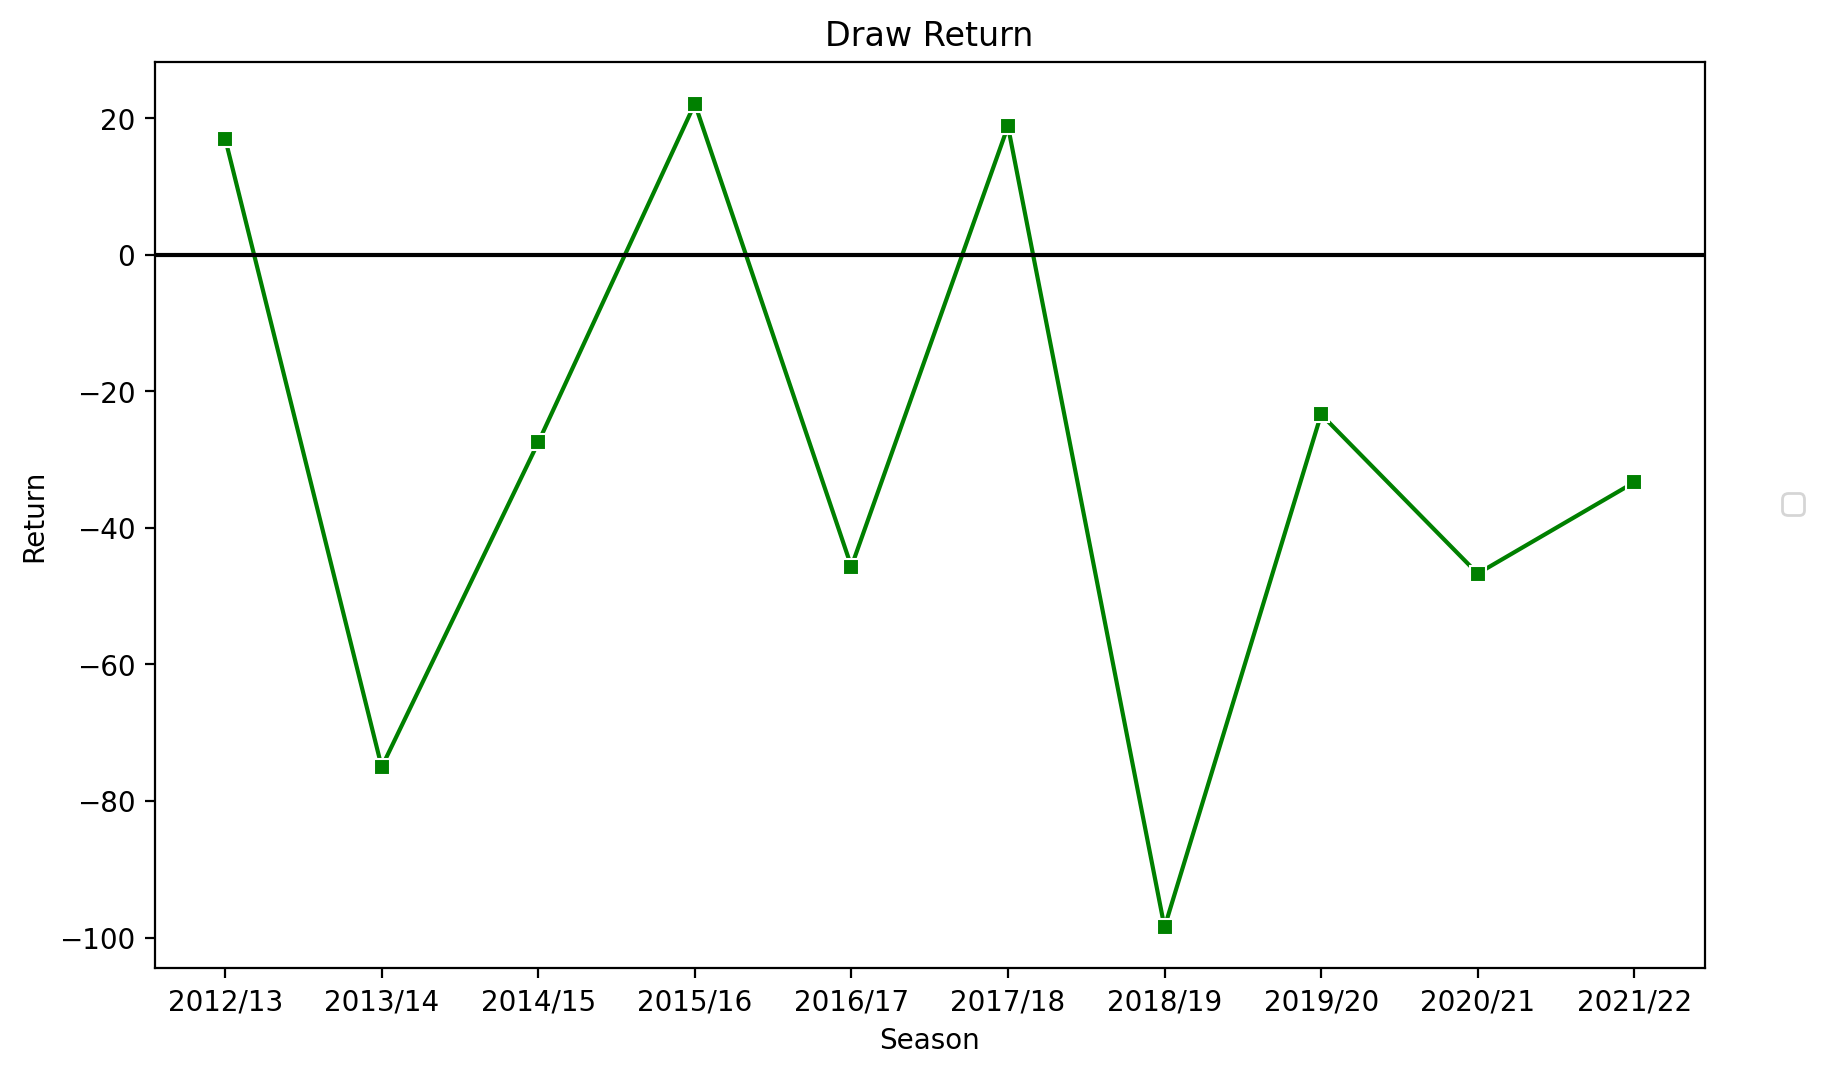

In [28]:
plt.figure(figsize = (10,6), dpi = 200)
sns.lineplot(data = df['Draw'], color = 'green', marker = 's')
plt.legend(loc = (1.05,0.5))
plt.axhline(y = 0, color = 'black')
plt.ylabel('Return')
plt.title('Draw Return');

One of the biggest observations from this can be seen in draw, it is in almost a perfect zig-zag like motion, with the return increasing in one year and falling again the next year (albeit not necessarily being positive) (exception = 2015/16 season).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Underdog Return')

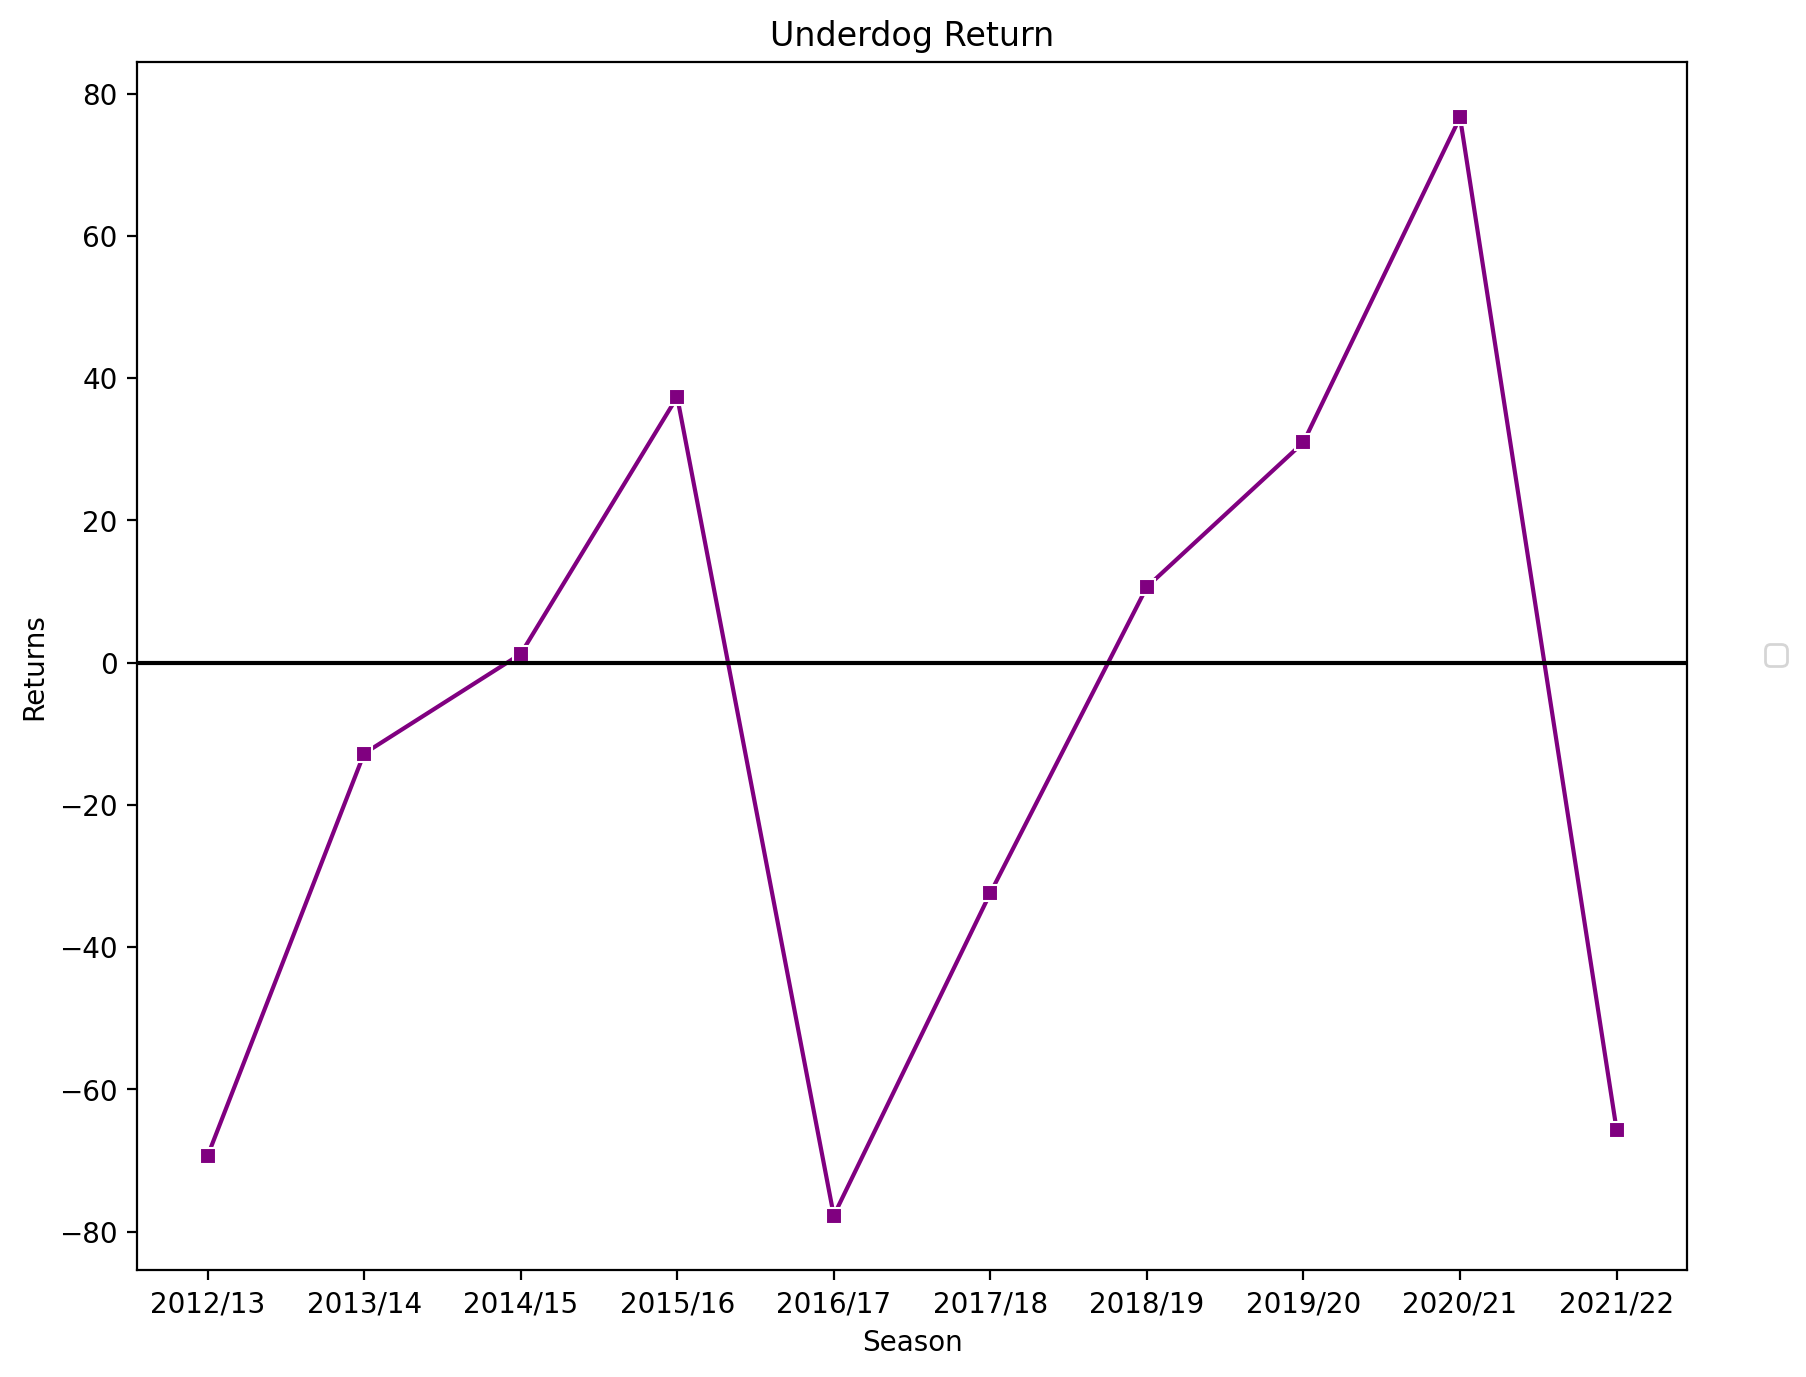

In [29]:
plt.figure(figsize = (10,8), dpi = 200)
sns.lineplot(data = df['Underdog'], color = 'purple', marker = 's')
plt.legend(loc = (1.05,0.5))
plt.ylabel('Returns')
plt.axhline(y = 0, color = 'black')
plt.title('Underdog Return')

Interestingly, returns for betting on underdog wins were very positive in the 2020/21 season (just like away wins were), before falling greatly in 2021/22, which suggests the bookies corrected their pricing model for underdogs the next season

In [30]:
len(df2021[((df2021['FTR'] == 'H') & (df2021['B365H'] > df2021['B365A'])) | ((df2021['FTR'] == 'A') & (df2021['B365A'] > df2021['B365H']))])

71

In [31]:
len(df2020[((df2020['FTR'] == 'H') & (df2020['B365H'] > df2020['B365A'])) | ((df2020['FTR'] == 'A') & (df2020['B365A'] > df2020['B365H']))])

100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Favourite Return')

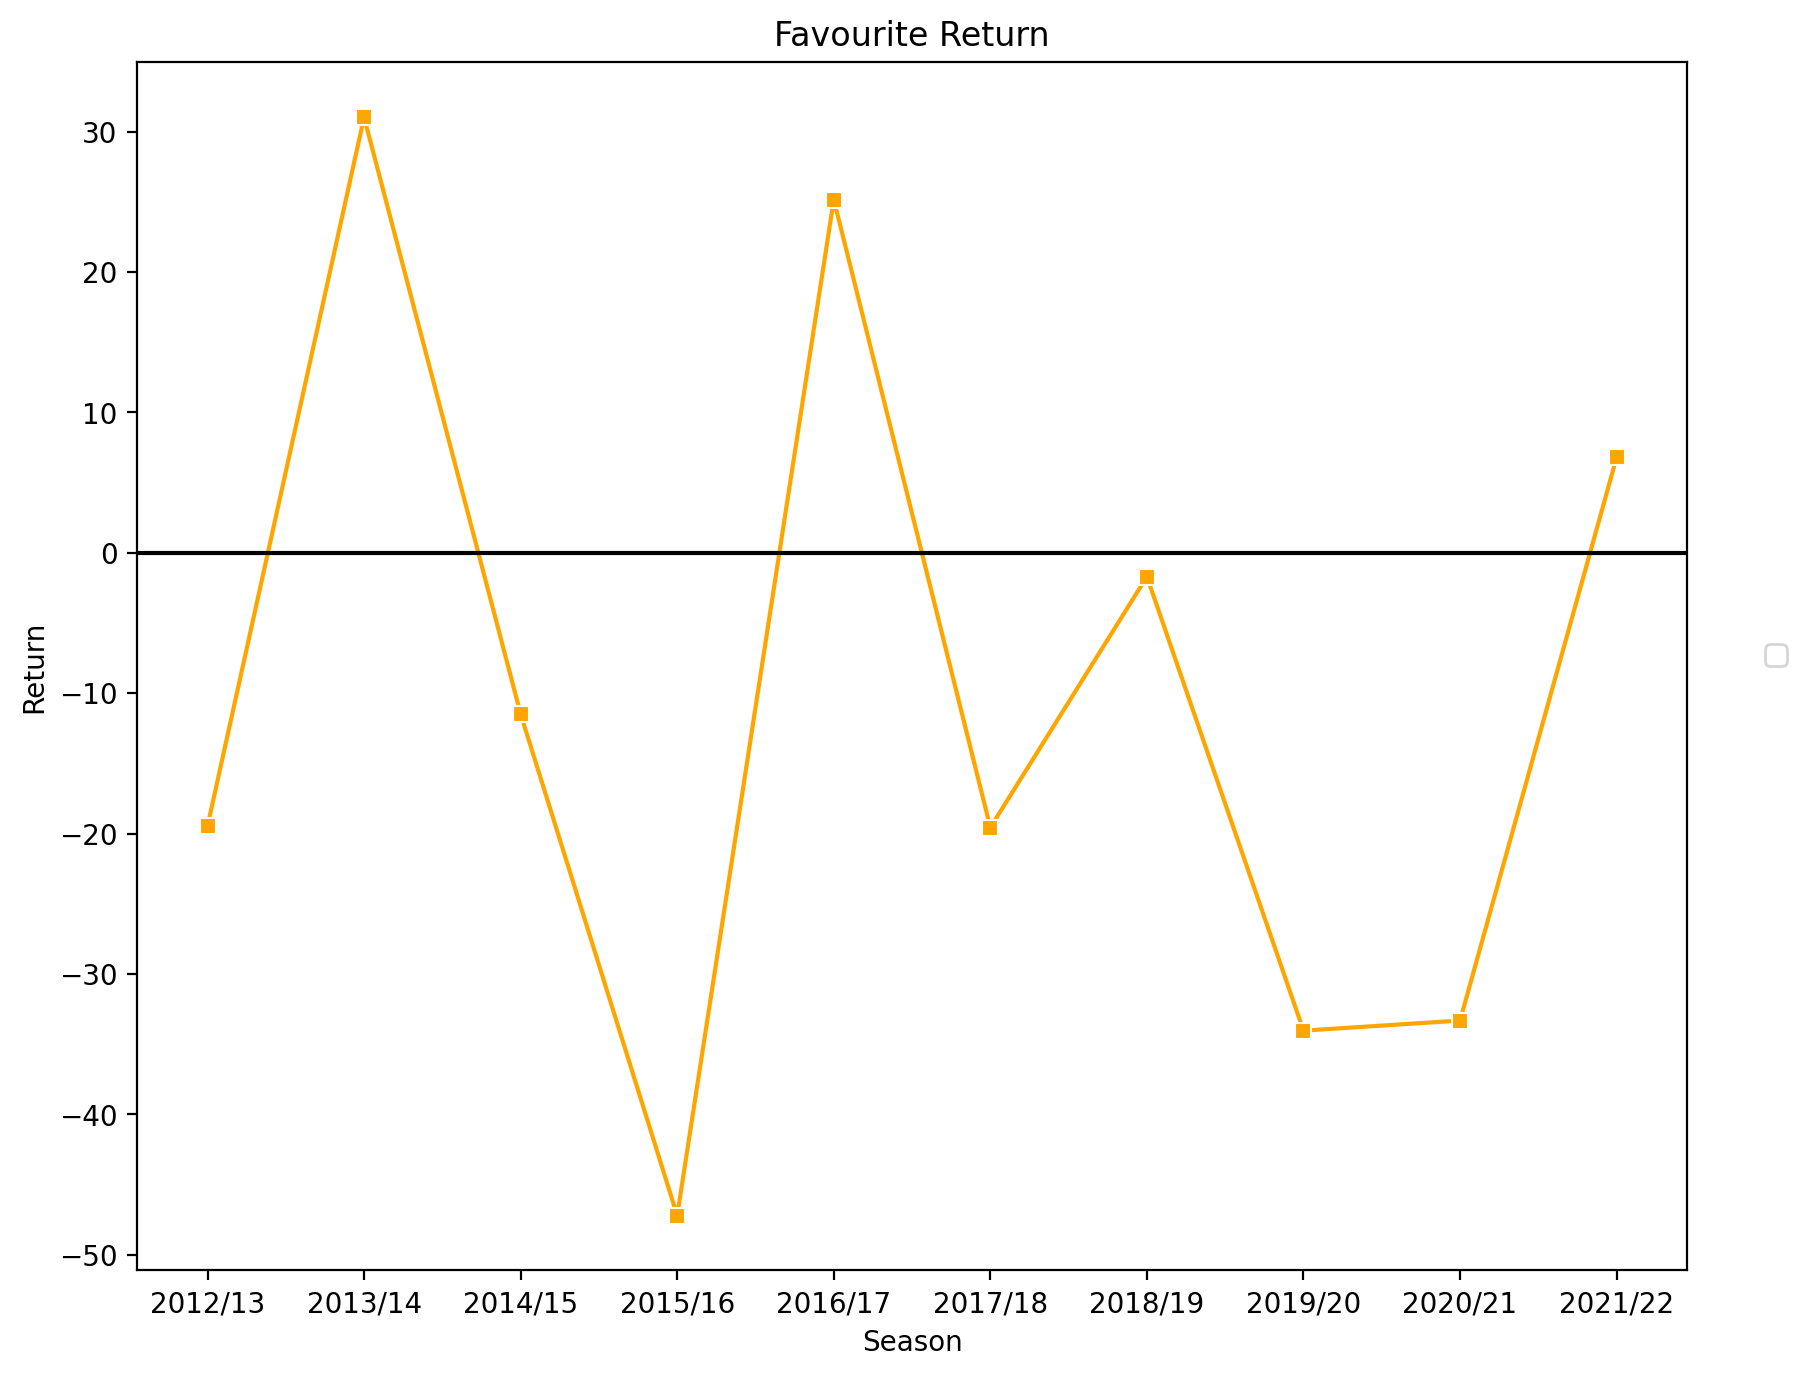

In [32]:
plt.figure(figsize = (10,8), dpi = 200)
sns.lineplot(data = df['Favourite'], color = 'orange', marker = 's')
plt.legend(loc = (1.05,0.5))
plt.axhline(y = 0, color = 'black')
plt.ylabel('Return')
plt.title('Favourite Return')

In [33]:
df

,Home,Away,Draw,Underdog,Favourite
Season,,,,,
2012/13,-42.64,-46.22,17.04,-69.40,-19.46
2013/14,8.39,9.83,-75.03,-12.80,31.02
2014/15,-6.32,1.60,-27.47,1.19,-11.49
2015/16,-33.67,32.05,22.15,37.34,-47.21
2016/17,24.93,-72.09,-45.67,-77.75,25.16
2017/18,10.98,-57.42,18.84,-32.41,-19.57
2018/19,19.18,-7.45,-98.49,10.63,-1.70
2019/20,16.01,-16.38,-23.37,30.97,-34.04
2020/21,-62.68,108.76,-46.69,76.65,-33.32


In [34]:
df2012['HomeTeam'].unique()

array(['Arsenal', 'Fulham', 'Newcastle', 'QPR', 'Reading', 'West Brom',
       'West Ham', 'Man City', 'Wigan', 'Everton', 'Chelsea',
       'Aston Villa', 'Man United', 'Norwich', 'Southampton', 'Swansea',
       'Tottenham', 'Liverpool', 'Stoke', 'Sunderland'], dtype=object)

In [35]:
teams = ['Chelsea', 'Man City', 'Man United', 'Tottenham', 'Everton', 'Liverpool', 'West Ham', 'Arsenal','Southampton']

List of the 9 teams that haven't been relegated since the 2012/13 season

In [36]:
def team(dataframe, team):
        homewin = dataframe[(dataframe['HomeTeam'] == team) & (dataframe['FTR'] == 'H')]
        awaywin = dataframe[(dataframe['AwayTeam'] == team) & (dataframe['FTR'] == 'A')]
        t = []
        t.extend([homewin['B365H'].sum() + awaywin['B365A'].sum() - 38])
        return t

    

Function that returns the dollar return on a team for a season in a list if we bet 1 dollar on that team to win each game (sum = 38 dollars per season). 

In [37]:
dataframes = [df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021]

List of the dataframes, makes it easier to loop through

In [38]:
o = []
for i in range(len(teams)):
    for j in range(len(dataframes)):
        x = team(dataframes[j], teams[i])
        o.append(x)
    


This for-loop takes each team, and then each season, and calculates the value for the function above. It then adds this to a list

In [39]:
len(o)

90

The length of this is 90. 10 seasons x 9 teams

In [40]:
teamdataframe = pd.DataFrame(o)

Making this a dataframe

In [41]:
teamdataframe = pd.DataFrame(np.reshape(teamdataframe[0].values, (9,10)))

Reshaping the dataframe so that it's in the correct order of row's and columns

In [42]:
df2 = teamdataframe.transpose()

In [43]:
df2

,0,1,2,3,4,5,6,7,8
0,2.04,-2.03,6.49,6.84,-4.82,-10.63,-5.15,-2.46,-8.79
1,7.87,2.58,-7.37,3.74,6.28,5.41,0.69,1.38,-1.18
2,0.29,-1.13,-1.18,5.48,-11.63,-4.13,-4.24,-0.46,0.61
3,-14.26,-8.41,1.39,0.36,-11.74,-2.96,35.23,-5.05,7.16
4,11.07,-4.08,-7.32,5.85,-0.97,1.04,-0.96,-2.75,-13.14
5,-2.89,6.73,4.85,-1.80,-7.45,-6.03,-7.21,-9.21,-22.54
6,-4.47,2.75,-5.03,1.83,-3.13,3.08,7.16,-1.60,-7.92
7,-2.09,-5.04,6.77,-6.57,-8.45,7.90,-2.35,-9.61,15.50
8,-4.99,-1.79,3.73,-1.09,10.96,-6.18,10.25,1.71,-8.73
9,-6.99,0.02,-10.77,12.86,-7.19,0.00,1.03,3.79,-12.27


In [44]:
df2.columns = [teams]

In [45]:
df2['Season'] = season

In [46]:
df2.set_index('Season', inplace = True)

Making the index be the season

In [47]:
df2

,Chelsea,Man City,Man United,Tottenham,Everton,Liverpool,West Ham,Arsenal,Southampton
Season,,,,,,,,,
"(2012/13,)",2.04,-2.03,6.49,6.84,-4.82,-10.63,-5.15,-2.46,-8.79
"(2013/14,)",7.87,2.58,-7.37,3.74,6.28,5.41,0.69,1.38,-1.18
"(2014/15,)",0.29,-1.13,-1.18,5.48,-11.63,-4.13,-4.24,-0.46,0.61
"(2015/16,)",-14.26,-8.41,1.39,0.36,-11.74,-2.96,35.23,-5.05,7.16
"(2016/17,)",11.07,-4.08,-7.32,5.85,-0.97,1.04,-0.96,-2.75,-13.14
"(2017/18,)",-2.89,6.73,4.85,-1.80,-7.45,-6.03,-7.21,-9.21,-22.54
"(2018/19,)",-4.47,2.75,-5.03,1.83,-3.13,3.08,7.16,-1.60,-7.92
"(2019/20,)",-2.09,-5.04,6.77,-6.57,-8.45,7.90,-2.35,-9.61,15.50
"(2020/21,)",-4.99,-1.79,3.73,-1.09,10.96,-6.18,10.25,1.71,-8.73


In [48]:
df2.index = df.index.map(lambda x: x.split(')')[0])

This lambda function changes the index values so that they don't have the brackets or the comma, i.e 2012/2013 instead of (2012/13,)

In [49]:
df2

,Chelsea,Man City,Man United,Tottenham,Everton,Liverpool,West Ham,Arsenal,Southampton
Season,,,,,,,,,
2012/13,2.04,-2.03,6.49,6.84,-4.82,-10.63,-5.15,-2.46,-8.79
2013/14,7.87,2.58,-7.37,3.74,6.28,5.41,0.69,1.38,-1.18
2014/15,0.29,-1.13,-1.18,5.48,-11.63,-4.13,-4.24,-0.46,0.61
2015/16,-14.26,-8.41,1.39,0.36,-11.74,-2.96,35.23,-5.05,7.16
2016/17,11.07,-4.08,-7.32,5.85,-0.97,1.04,-0.96,-2.75,-13.14
2017/18,-2.89,6.73,4.85,-1.80,-7.45,-6.03,-7.21,-9.21,-22.54
2018/19,-4.47,2.75,-5.03,1.83,-3.13,3.08,7.16,-1.60,-7.92
2019/20,-2.09,-5.04,6.77,-6.57,-8.45,7.90,-2.35,-9.61,15.50
2020/21,-4.99,-1.79,3.73,-1.09,10.96,-6.18,10.25,1.71,-8.73


In [50]:
df2.describe()

,Chelsea,Man City,Man United,Tottenham,Everton,Liverpool,West Ham,Arsenal,Southampton
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-1.442000,-1.040000,-0.844000,2.750000,-3.814000,-1.250000,3.445000,-2.426000,-5.130000
std,7.285776,4.347083,6.418572,5.434992,7.451695,5.773405,12.397428,4.464704,10.942164
min,-14.260000,-8.410000,-10.770000,-6.570000,-11.740000,-10.630000,-7.210000,-9.610000,-22.540000
25%,-4.860000,-3.567500,-6.747500,-0.727500,-8.200000,-5.555000,-3.767500,-4.475000,-11.400000
50%,-2.490000,-1.460000,0.105000,2.785000,-6.005000,-1.480000,-0.135000,-2.030000,-8.325000
75%,1.602500,1.940000,4.570000,5.757500,-1.510000,2.570000,5.627500,0.920000,0.162500
max,11.070000,6.730000,6.770000,12.860000,10.960000,7.900000,35.230000,3.790000,15.500000


Interestingly, both Tottenham  and West Ham have a positive mean return. Compared to our previous strategies, these are the only positive means throughout this experiment.

The minimum return was Southampton (-22.54 dollars), which is perhaps expected as they are a less established club than the others so on average they would win far less games throughout a season than the others.

West Ham had the highest return (35.23 dollars). This is a lot higher than any of the other club's maximums (next highest is Southampton at 15.5 dollars) so this could be considered an outlier in the dataset. This is an incredible return on investment of 92.71% for that season

In [51]:
Average_Tottenham_ROI = df2['Tottenham'].mean() * 100 / 38
Average_WestHam_ROI = df2['West Ham'].mean() * 100 / 38

In [52]:
Average_Tottenham_ROI

Tottenham    7.236842
dtype: float64

In [53]:
Average_WestHam_ROI

West Ham    9.065789
dtype: float64

This means that over the 10 seasons, Tottenham had an average return on investment of 7.24%. West Ham had an average return on investment of 9.06% . These are quite high in my opinion. The huge return discussed above skews the mean West Ham value though so caution must be taken on that regard

In [54]:
df2.columns

MultiIndex([(    'Chelsea',),
            (   'Man City',),
            ( 'Man United',),
            (  'Tottenham',),
            (    'Everton',),
            (  'Liverpool',),
            (   'West Ham',),
            (    'Arsenal',),
            ('Southampton',)],
           )

In [55]:
df2.columns = ['_'.join(col) for col in df2.columns]

In [56]:
df2.columns

Index(['Chelsea', 'Man City', 'Man United', 'Tottenham', 'Everton',
       'Liverpool', 'West Ham', 'Arsenal', 'Southampton'],
      dtype='object')

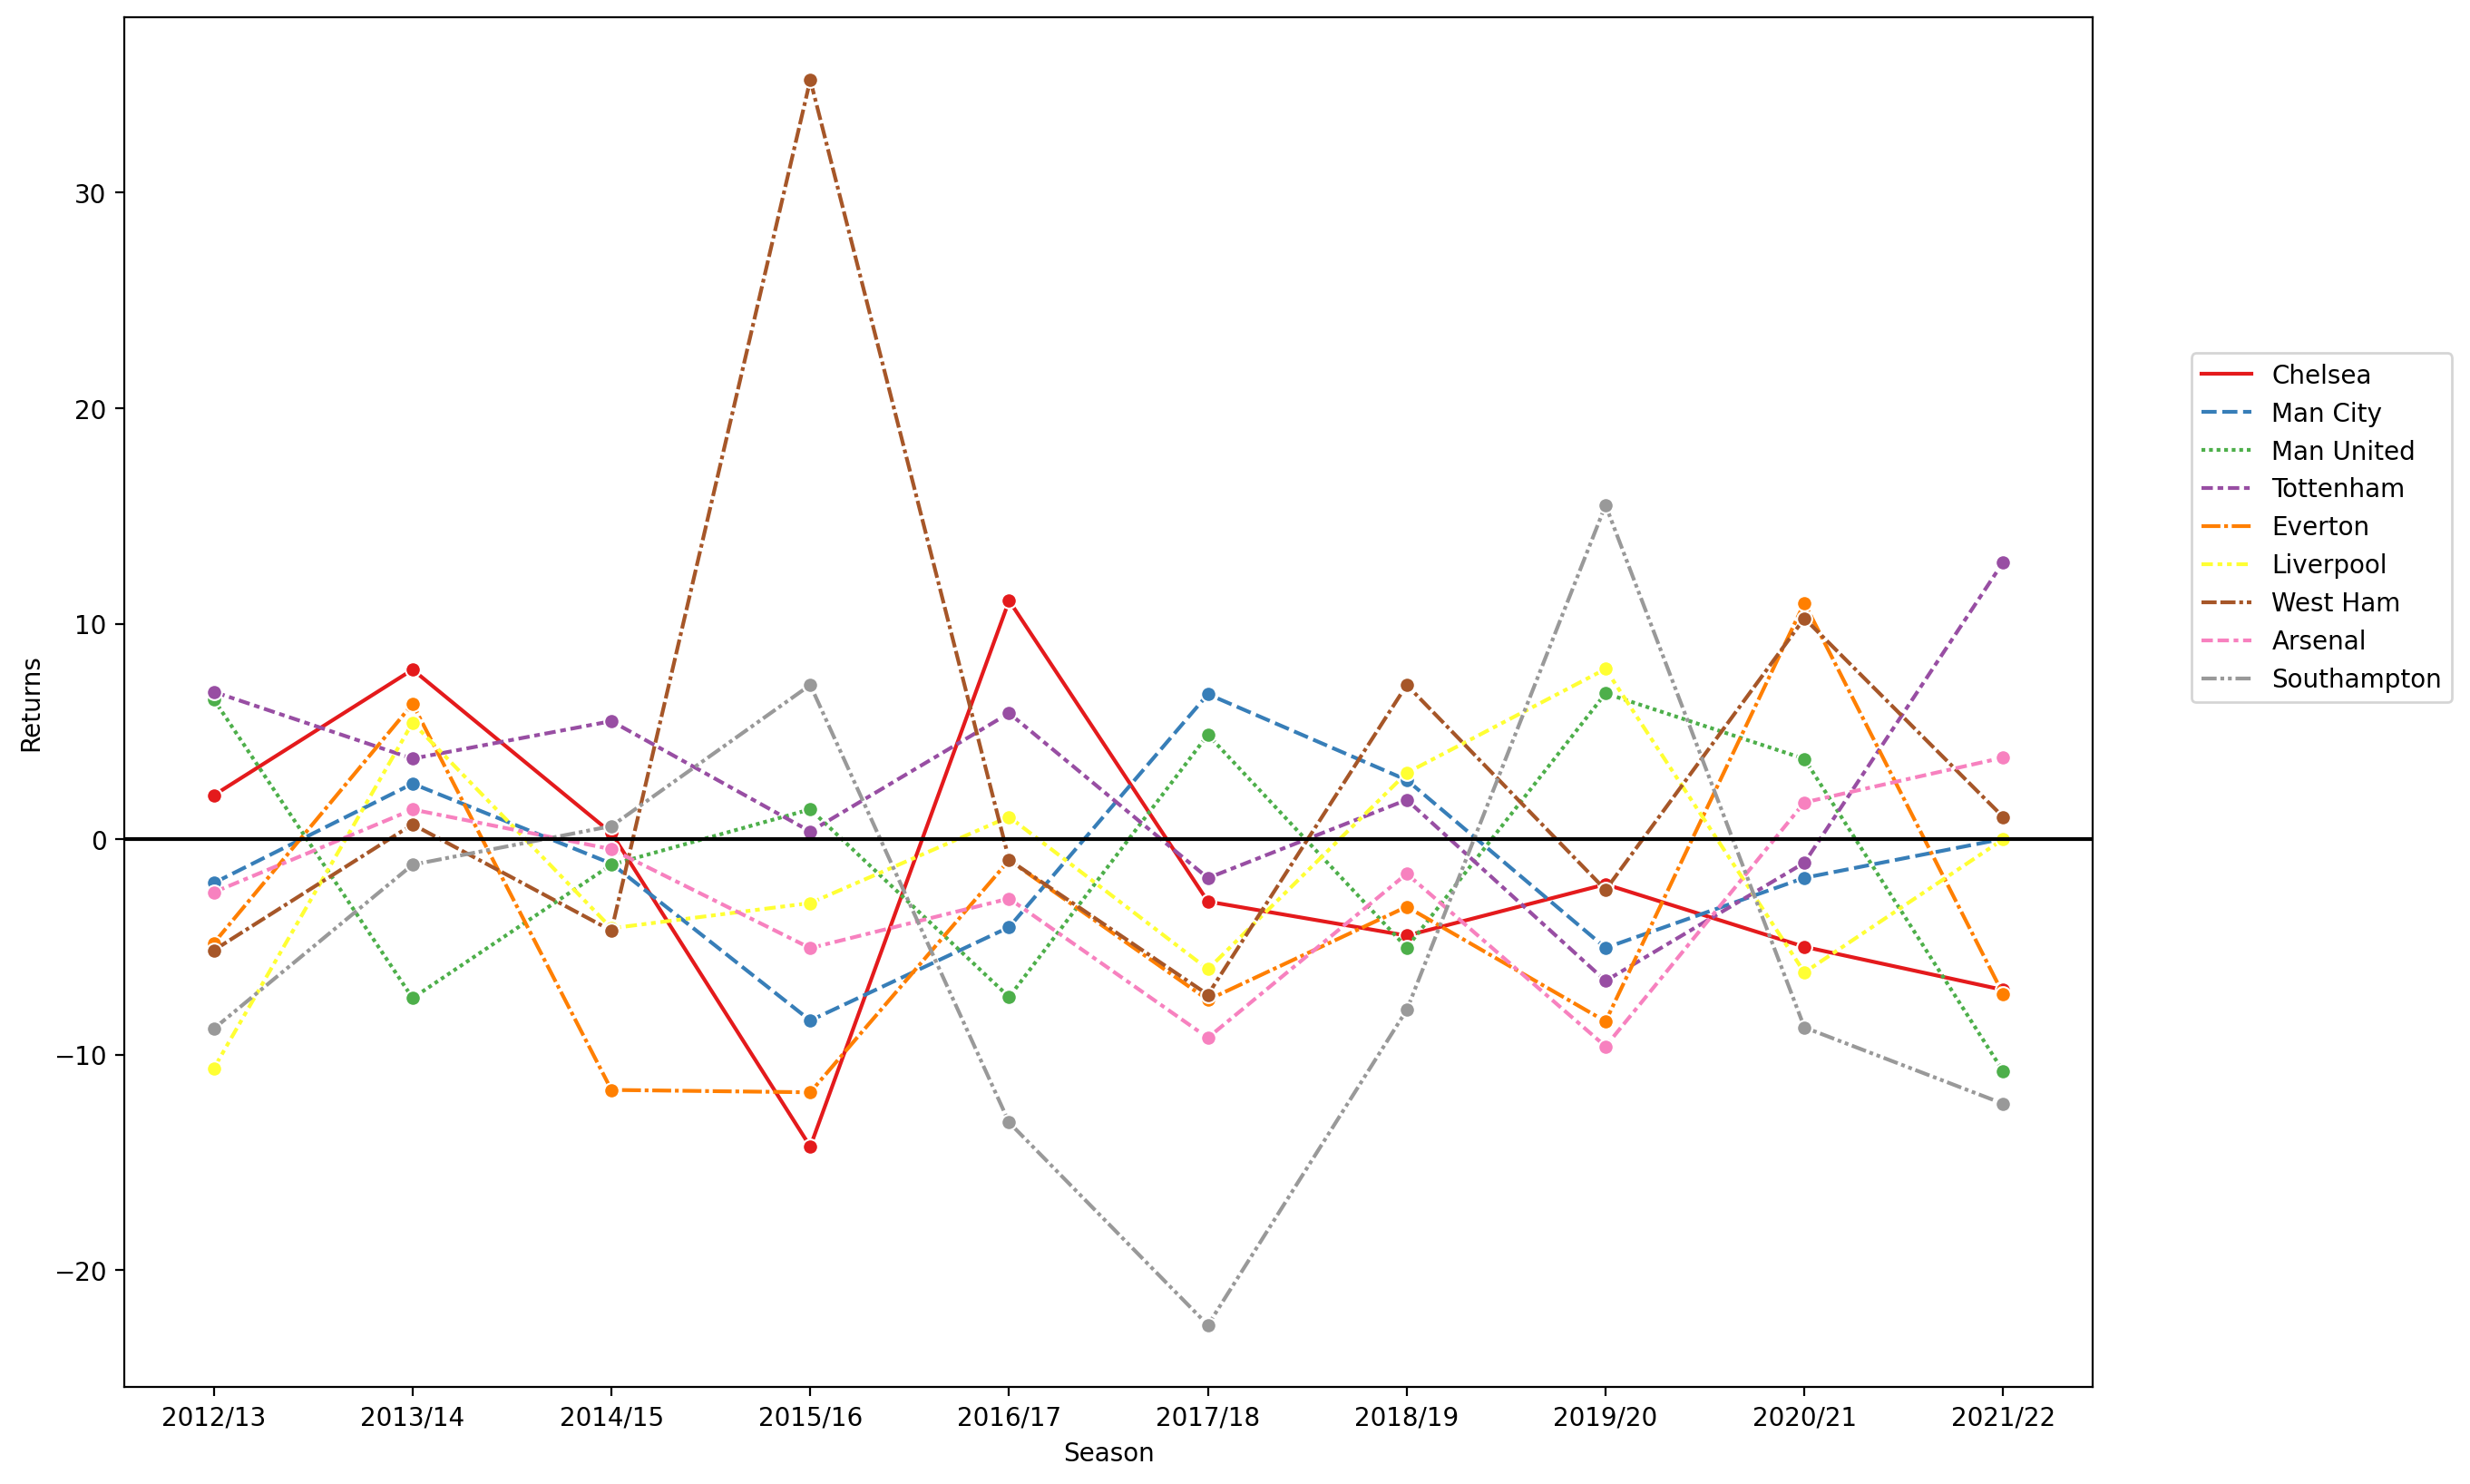

In [57]:
plt.figure(figsize = (14,10), dpi = 200)
sns.lineplot(data = df2[['Chelsea', 'Man City', 'Man United', 'Tottenham', 'Everton',
       'Liverpool', 'West Ham', 'Arsenal', 'Southampton']] , palette = 'Set1', marker = 'o')
plt.ylabel('Returns')
plt.legend(loc = (1.05,0.5))
plt.axhline(y = 0, color = 'black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


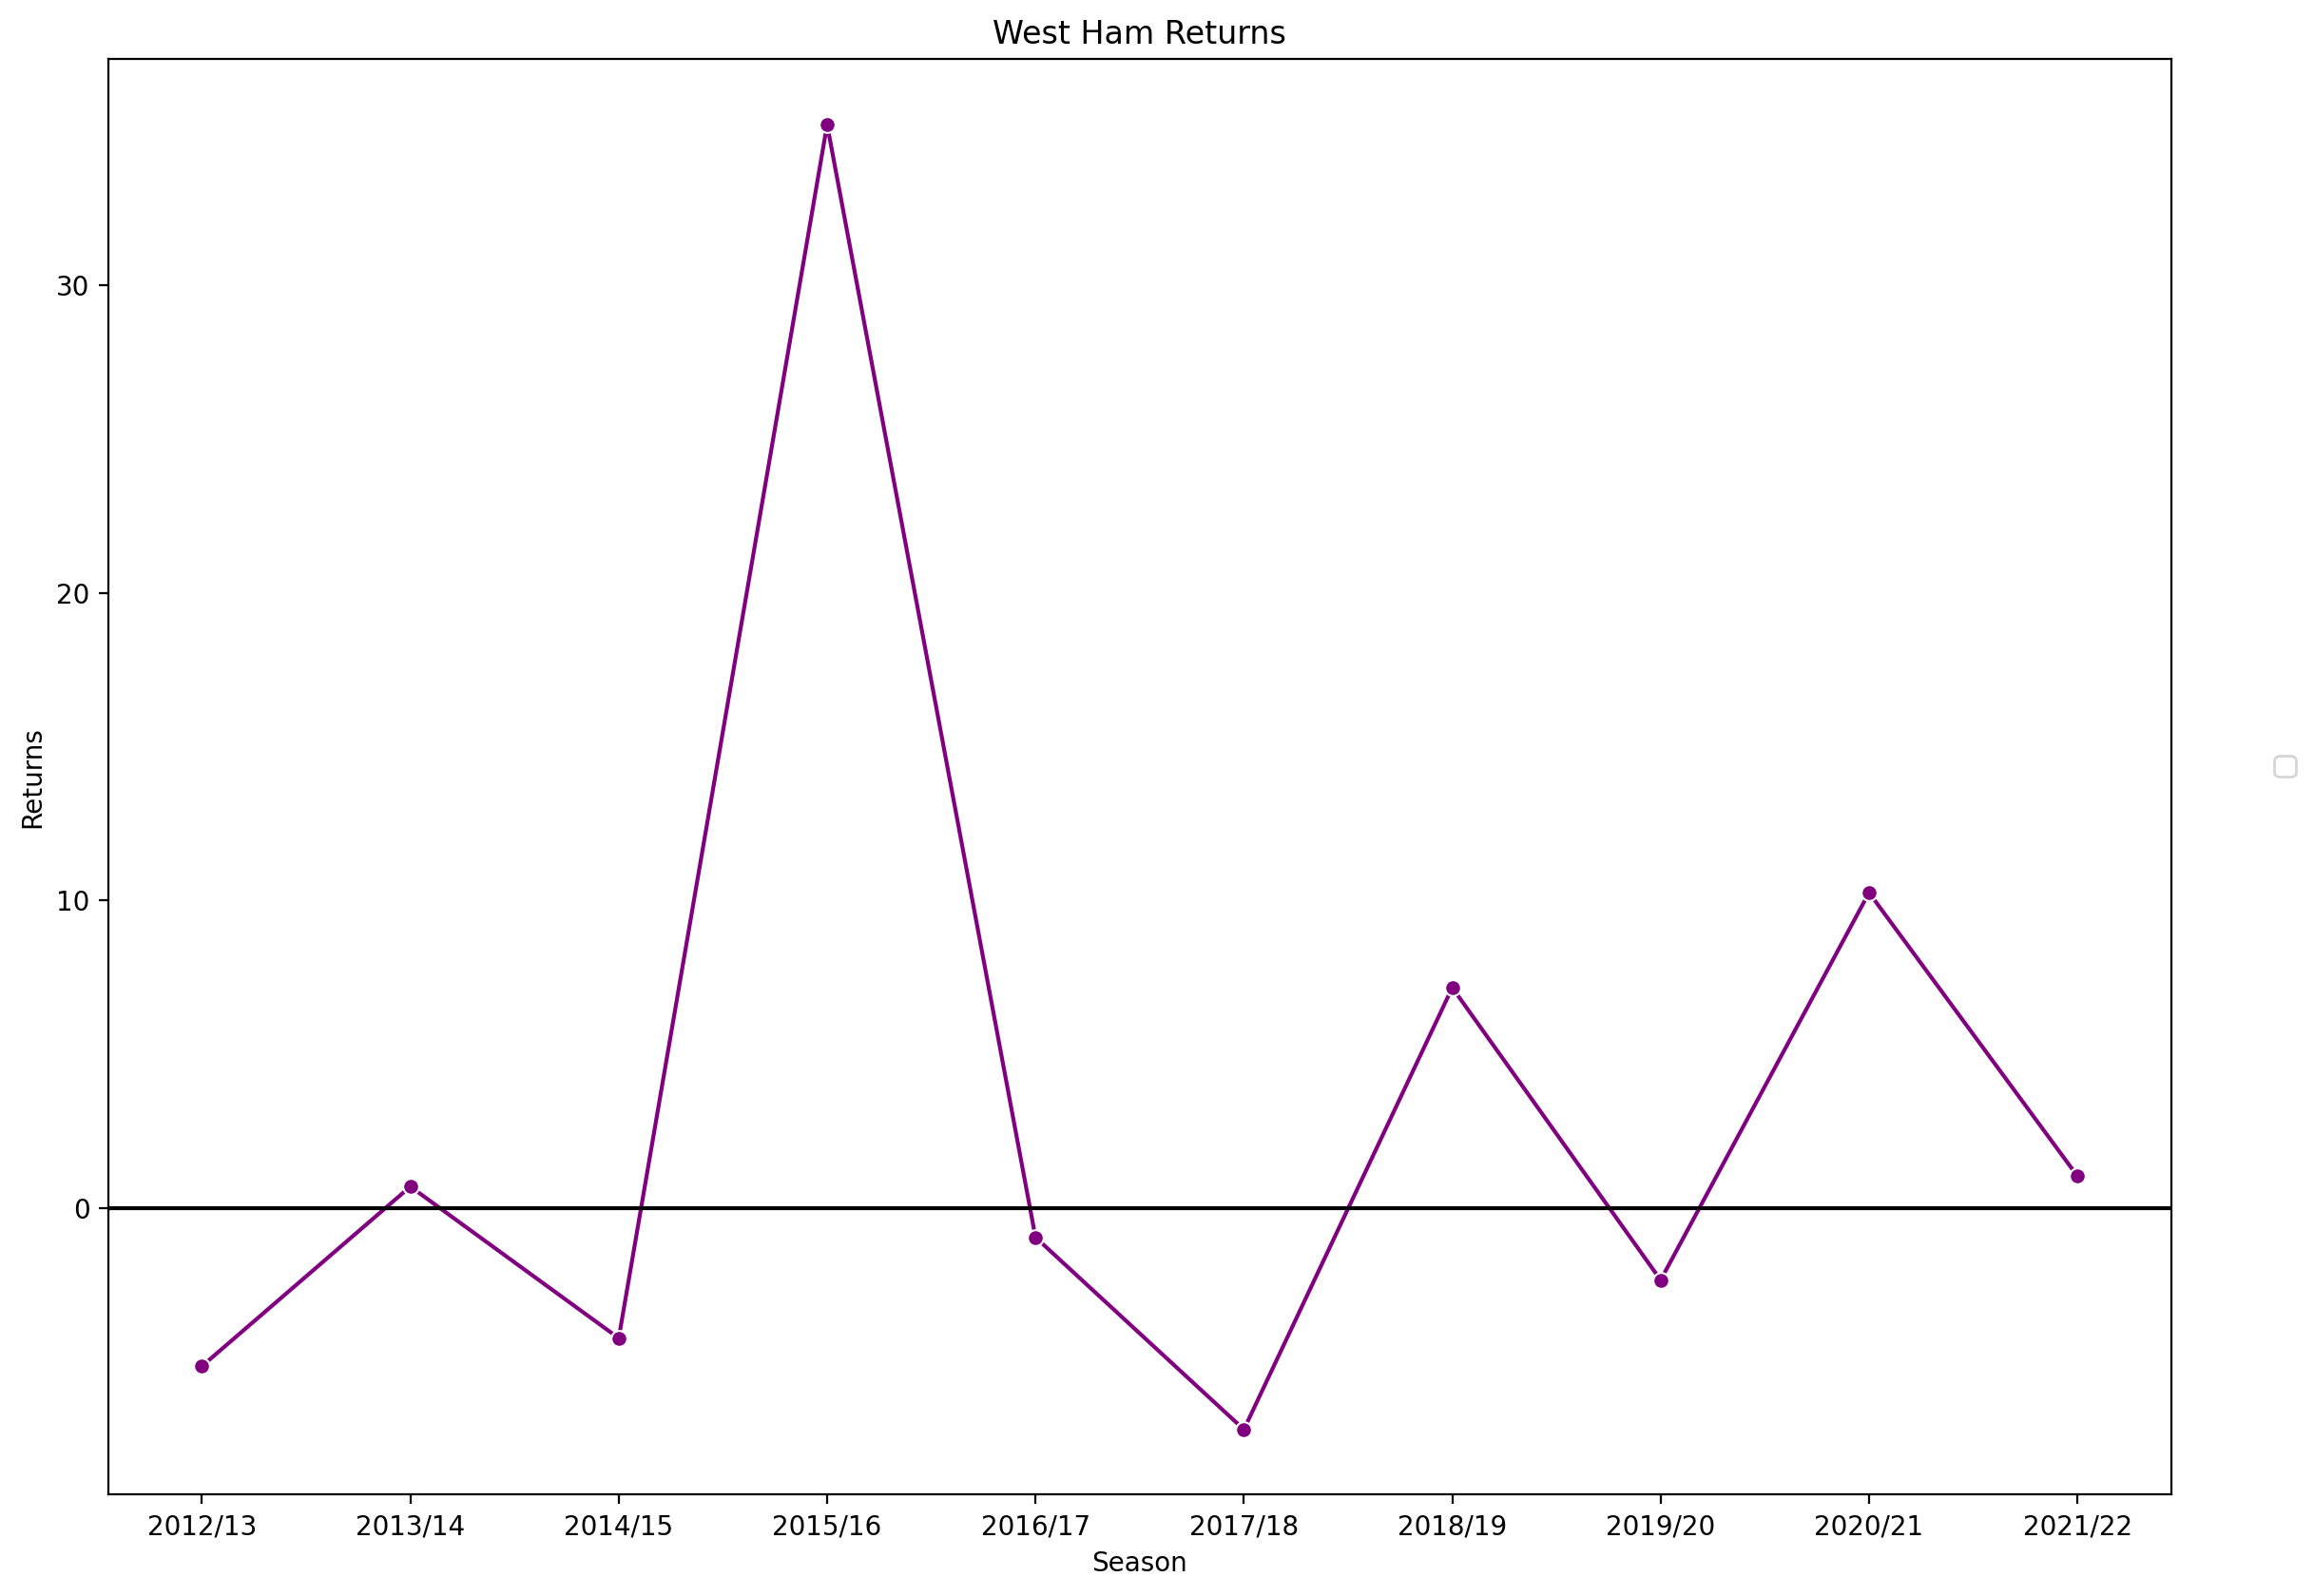

In [63]:
plt.figure(figsize = (14,10), dpi = 200)
sns.lineplot(data = df2['West Ham'] , color = 'purple', marker = 'o')
plt.ylabel('Returns')
plt.legend(loc = (1.05,0.5))
plt.title('West Ham Returns')
plt.axhline(y = 0, color = 'black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


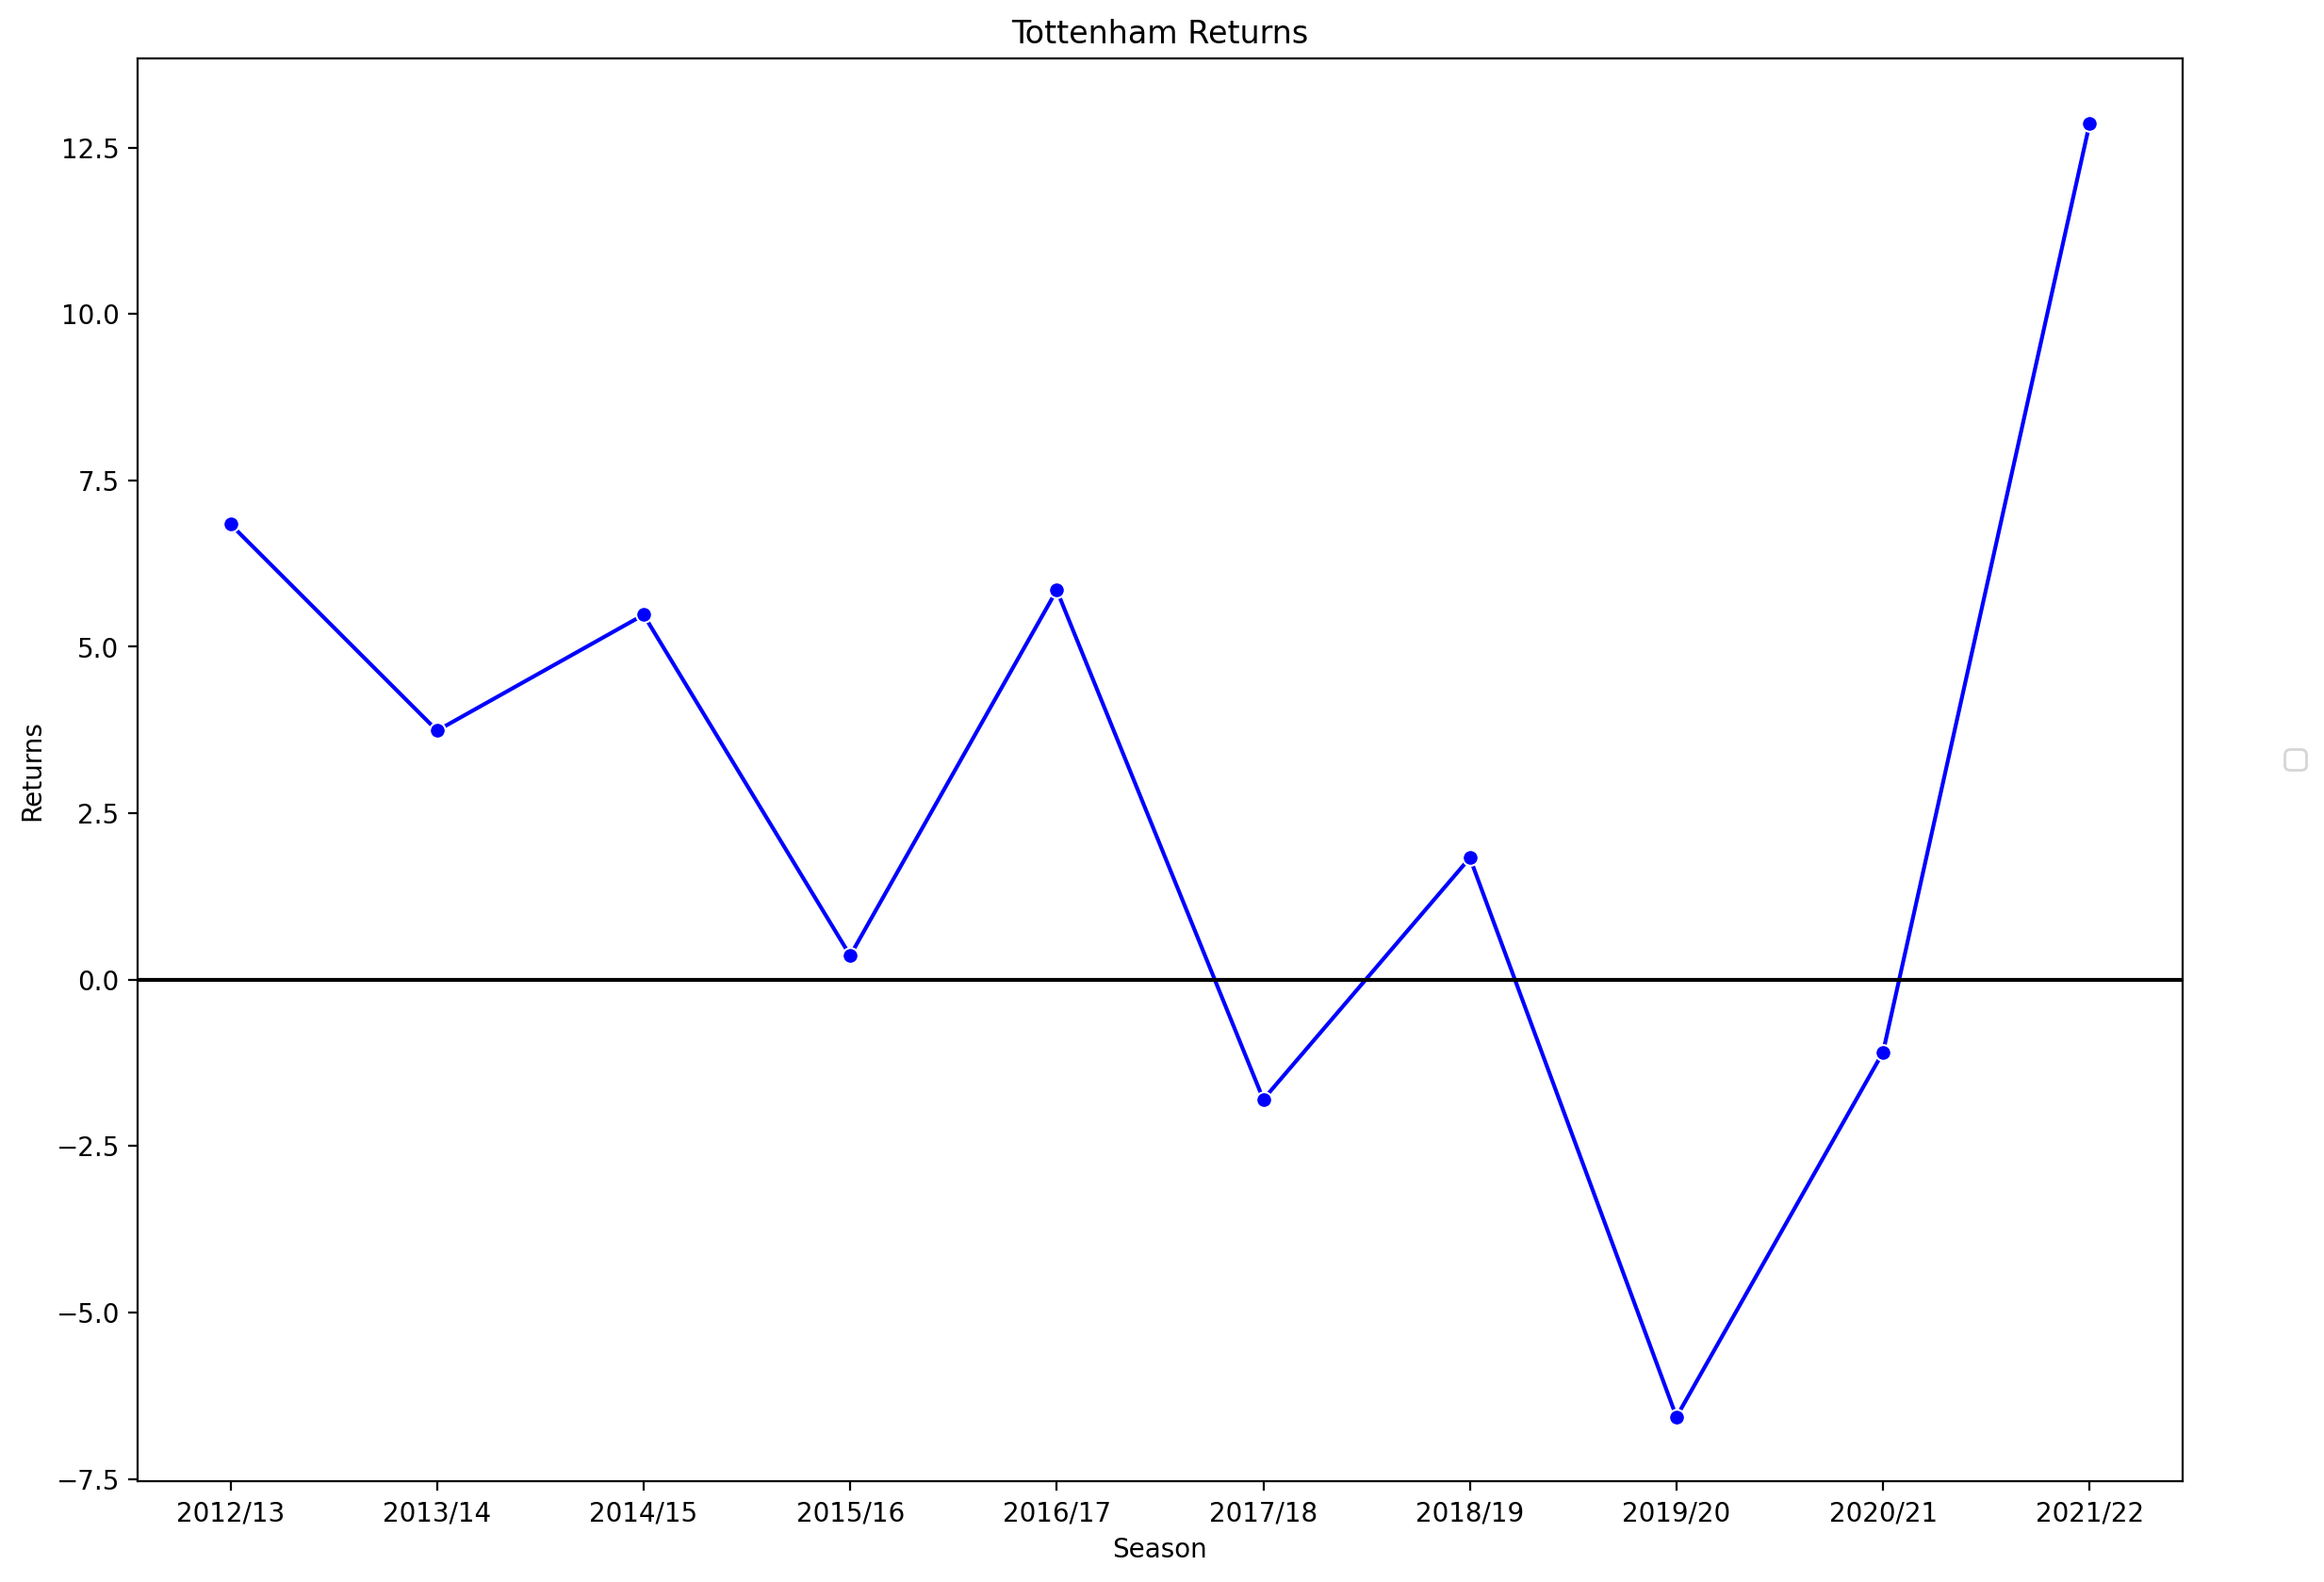

In [65]:
plt.figure(figsize = (14,10), dpi = 200)
sns.lineplot(data = df2['Tottenham'] , color = 'blue', marker = 'o')
plt.ylabel('Returns')
plt.title('Tottenham Returns')
plt.legend(loc = (1.05,0.5))
plt.axhline(y = 0, color = 'black')

This plot is obviously quite hard to interpret, but we can see the large volatility in the returns from season to season, making it difficult to make out any type of pattern. The outlier of the large return by West Ham in the 2015/16 season is a big standout, aswell as the low return of Southampton in the 2017/18 season. Overall it is clear that a loss is the most common return, or else a very low positive return

# Conclusion

I decided not to attempt to fit a machine learning model on the data for either the categories or the teams. This is because of the high volatility and unpredicitablity of the data observed meaning the accuracy would likely be very low. Season would be the x variable and there are a lot more factors that go into returns and match outcomes than the season being played so I decided to refrain from trying to fit a prediction